In [3]:
import pandas as pd

# Read the file and import all rows.
df = pd.read_csv('violations.csv')

# Change the data type of the 'Issue Date' column to date.
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

# Print out the number of rows imported from the file.
print('Number of Rows: ' + str(len(df)))

Number of Rows: 50000


In [4]:
# Remove rows containing invalid data.
df = df[(df['Registration State'] != "99") & (df['Plate Type'] != "999") & (df['Issue Date'] >= '2020-04-01')
                 & (df['Issue Date'] <= '2020-11-30') & (df['Violation Code'] != 0) & (df['Vehicle Make'].notnull())
                 & (df['Violation Time'].notnull()) & (df['Vehicle Year'] != 0) & (df['Vehicle Year'] <= 2020)]

# Print out the number of rows remaining in the dataset.
print('Number of Rows: ' + str(len(df)))

Number of Rows: 38937


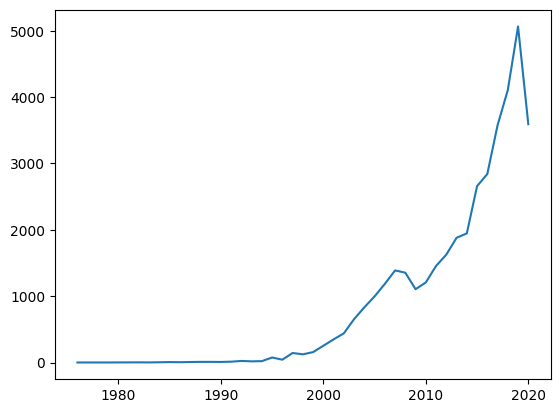

In [5]:
import matplotlib.pyplot as plt

# Isolate the data to be used in the plot.
df_vehicle_year = df.groupby('Vehicle Year')['Summons Number'].count()

# Create a plot that shows the number of parking violations for each vehicle year.
plt.plot(df_vehicle_year)
plt.show()

In [6]:
df[df['Registration State'] != 'NY'].groupby('Violation Code')['Summons Number'].count().nlargest(5).reset_index(name='Count')

,Violation Code,Count
0,36,2772
1,5,365
2,7,350
3,12,62
4,21,30


In [7]:
df[df['Vehicle Make'] == 'HONDA'].groupby('Street Name')['Summons Number'].count().nlargest(1).reset_index(name='Count')

,Street Name,Count
0,Broadway,34


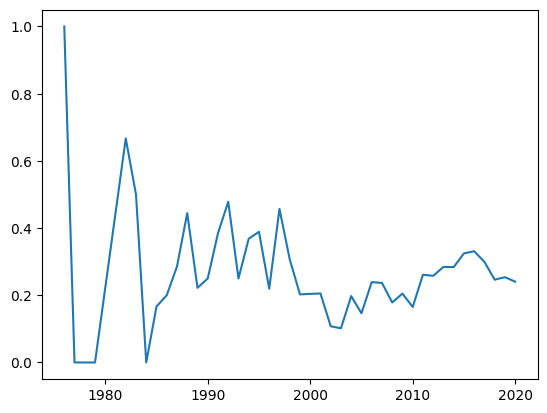

In [8]:
# Subset for only rows where the Registration State is NY.
df_ny = df[df['Registration State'] == 'NY']

# Calculate the ratio of non-passenger plates to all plates, grouped by year.
df_ny_notpas = df_ny[df_ny['Plate Type'] != 'PAS'].groupby('Vehicle Year')['Summons Number'].count()
df_ny_all = df_ny.groupby('Vehicle Year')['Summons Number'].count()
ratio = df_ny_notpas / df_ny_all

# Replace nulls with 0.
ratio.fillna(0, inplace = True)

# Create and show plot.
plt.plot(ratio)
plt.show()

In [9]:
df[df['Plate Type'] == 'PAS'].groupby('Vehicle Color')['Summons Number'].count().nlargest(1).reset_index(name='Count')

,Vehicle Color,Count
0,GY,7797


In [10]:
print('Number of Registration States: ' + str(df['Registration State'].nunique()))

print('Average Number of Parking Violations per Registration State: ' +
      str(df.groupby('Registration State')['Summons Number'].count().mean()))

Number of Registration States: 45
Average Number of Parking Violations per Registration State: 865.2666666666667


In [11]:
df.groupby('Violation Code')['Plate Type'].apply(lambda x: x.value_counts().head(1)).reset_index(name='Count').rename(columns={'level_1': 'Plate Type'})

,Violation Code,Plate Type,Count
0,4,COM,4
1,5,PAS,1080
2,6,APP,3
3,7,PAS,1398
4,8,PAS,1
...,...,...,...
70,91,PAS,2
71,94,PAS,2
72,95,PAS,1
73,98,PAS,92


In [12]:
# Count the number of parking violations in each county.
df_county = df.groupby('Violation County')['Summons Number'].count().reset_index(name='Percentage')

# Calculate the number of parking violations in each county as a percentage of all parking violations.
df_county['Percentage'] = df_county['Percentage'] / df_county['Percentage'].sum() * 100

# Sort and display the resulting dataframe.
df_county.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

,Violation County,Percentage
0,NY,20.769903
1,BK,15.104917
2,QN,13.734314
3,BX,13.371734
4,K,13.104300
5,Q,12.983440
6,MN,6.912158
7,ST,3.342934
8,R,0.676301
